<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<!-- TODO(b/319266067) remove temporary advert after a few weeks. -->
<div class="markdown-google-sans">
  <h2>(New) Try the Gemini API</h2>
  <ul>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  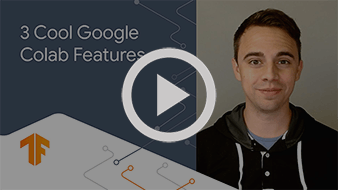
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/loan.csv")
print(df.head(),
df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      

In [5]:
my_data=df.copy()
my_data.drop(['Gender','Loan_ID'],axis=1,inplace=True)


<Axes: title={'center': 'Property_Area'}>

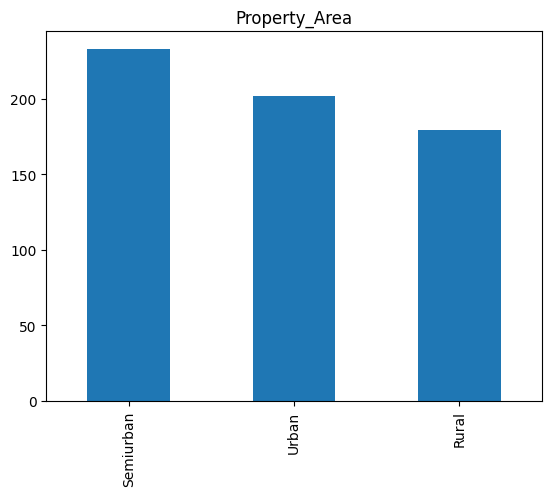

In [6]:
df["Property_Area"].value_counts().plot.bar(title="Property_Area")

In [7]:
my_data['Married'] = my_data['Married'].map({"No":0,"Yes":1})
my_data['Self_Employed'] = my_data['Self_Employed'].map({"No":0,"Yes":1})
my_data['Education'] = my_data['Education'].map({"Not Graduate":0,"Graduate":1})
my_data['Loan_Status'] = my_data['Loan_Status'].map({"N":0,"Y":1})

In [8]:
label_encoder = preprocessing.LabelEncoder()
my_data['Dependents'] = label_encoder.fit_transform(my_data['Dependents'])
my_data['Property_Area'] = label_encoder.fit_transform(my_data['Property_Area'])
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            611 non-null    float64
 1   Dependents         614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      582 non-null    float64
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 52.9 KB


In [9]:
duplicate_rows = my_data[my_data.duplicated()]
print("Number of duplicate rows : ",duplicate_rows.shape)
my_data.isnull().sum()

Number of duplicate rows :  (1, 11)


Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
my_data.drop_duplicates(inplace=True)
duplicate_rows.shape

(1, 11)

In [11]:
my_data['Married'].fillna(0, inplace=True)
my_data['Self_Employed'].fillna(0, inplace=True)
my_data['LoanAmount'].fillna(my_data['LoanAmount'].mean(), inplace=True)
my_data['Loan_Amount_Term'].fillna(my_data['Loan_Amount_Term'].mean(), inplace=True)
my_data['Credit_History'].fillna(my_data['Credit_History'].mean(), inplace=True)


In [12]:
my_data.isnull().sum()

Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

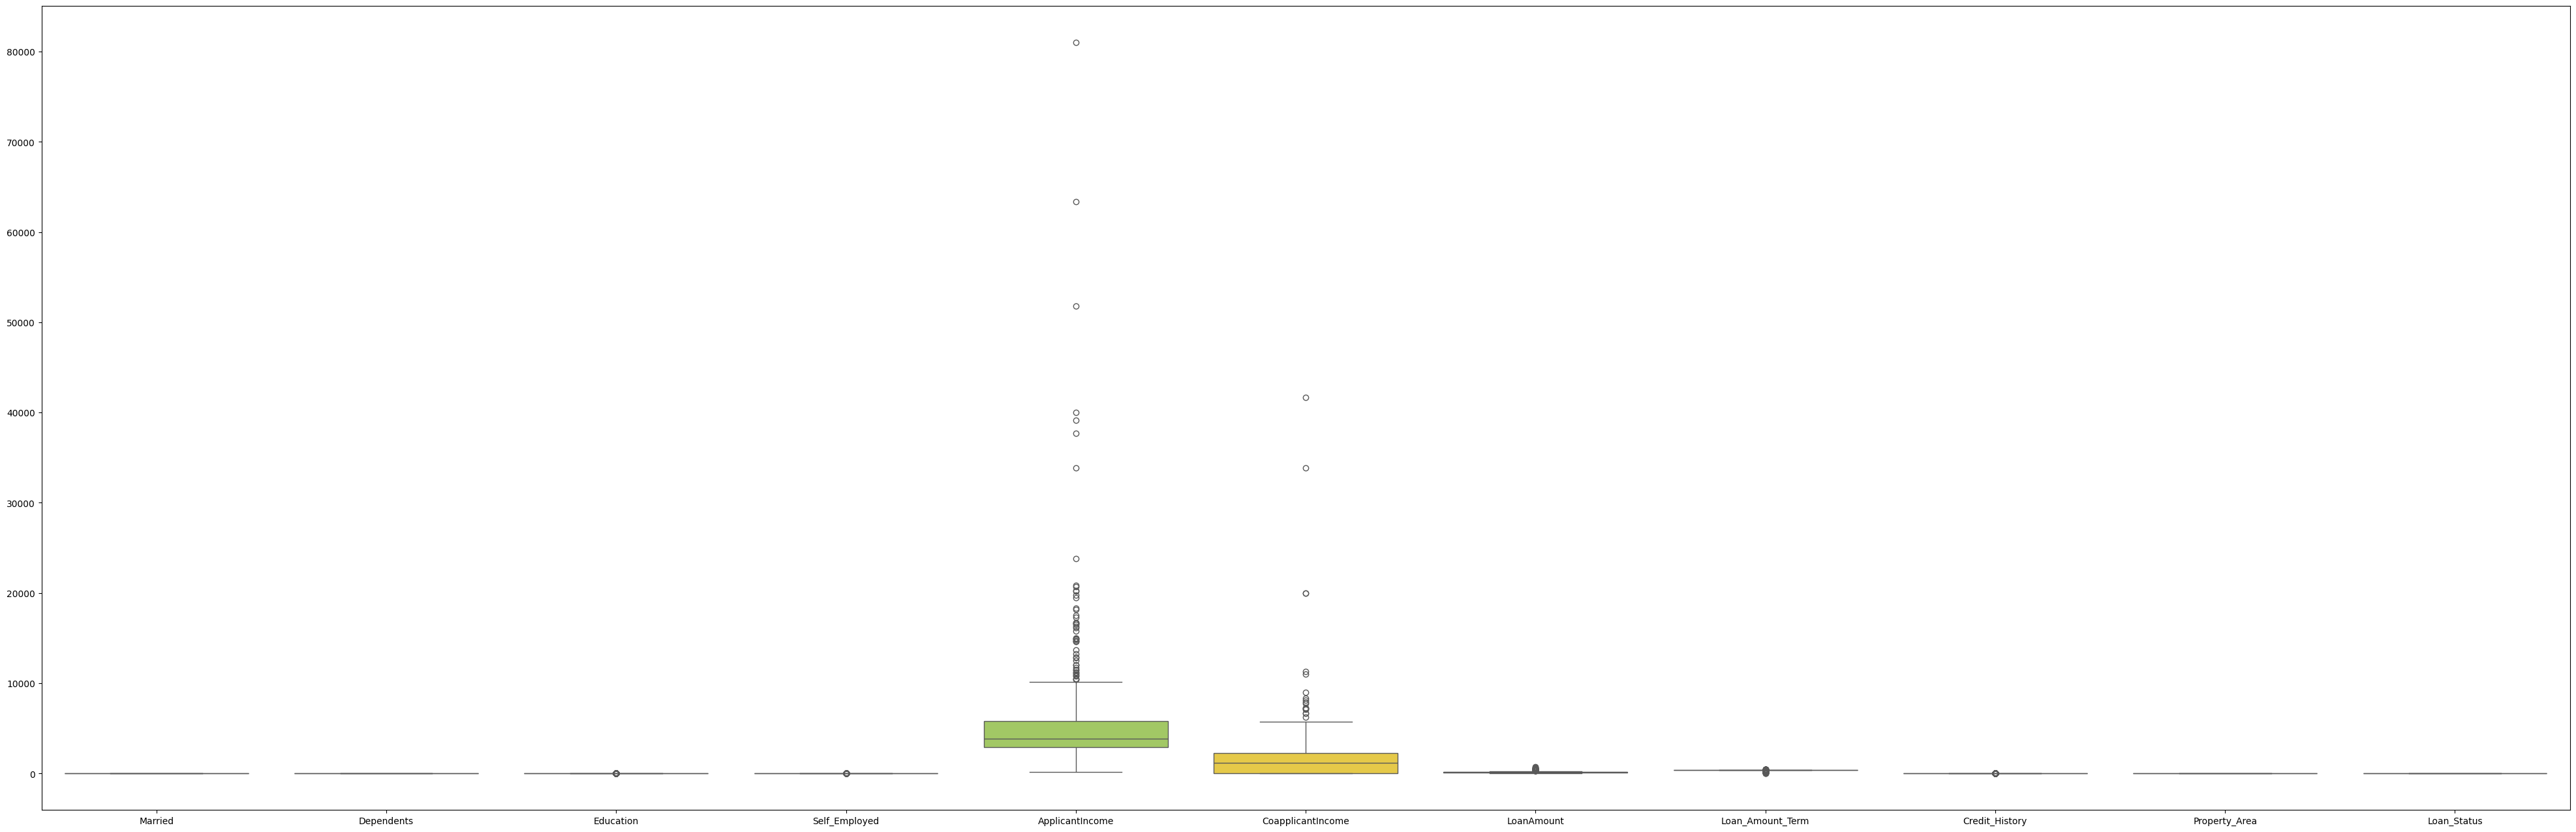

In [13]:
fig, ax = plt.subplots(figsize=(50,16))
sns.boxplot(data=my_data, orient="v", palette="Set2")
plt.show()


In [14]:
# Remove Outlier
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    print("Q1 = ", Q1, " Q3 = ", Q3, " IQR = ", IQR)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Extract all column names as list in Pandas Dataframe
lst_all_cols = my_data.columns.tolist()
print("lst_all_cols : \n",lst_all_cols)

print("\n")
# Numerical data distribution
print(list(set(my_data.dtypes.tolist())))
#df_num = my_data.select_dtypes(include = ["float64"])
lst_num_cols = my_data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].columns.tolist()
print("Numerical Data : \n",lst_num_cols)
print("\n")


indx = 0
for col in lst_num_cols:
    print(indx)
    lower_range, upper_range =  remove_outlier(my_data[col])
    my_data[col] = np.where(my_data[col] < lower_range, lower_range, my_data[col])
    my_data[col] = np.where(my_data[col] > upper_range, upper_range, my_data[col])
    indx = indx +1
    print("-----------------------------")


lst_all_cols : 
 ['Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


[dtype('float64'), dtype('int64')]
Numerical Data : 
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


0
Q1 =  2876.0  Q3 =  5800.0  IQR =  2924.0
-----------------------------
1
Q1 =  0.0  Q3 =  2283.0  IQR =  2283.0
-----------------------------
2
Q1 =  100.0  Q3 =  165.0  IQR =  65.0
-----------------------------
3
Q1 =  360.0  Q3 =  360.0  IQR =  0.0
-----------------------------


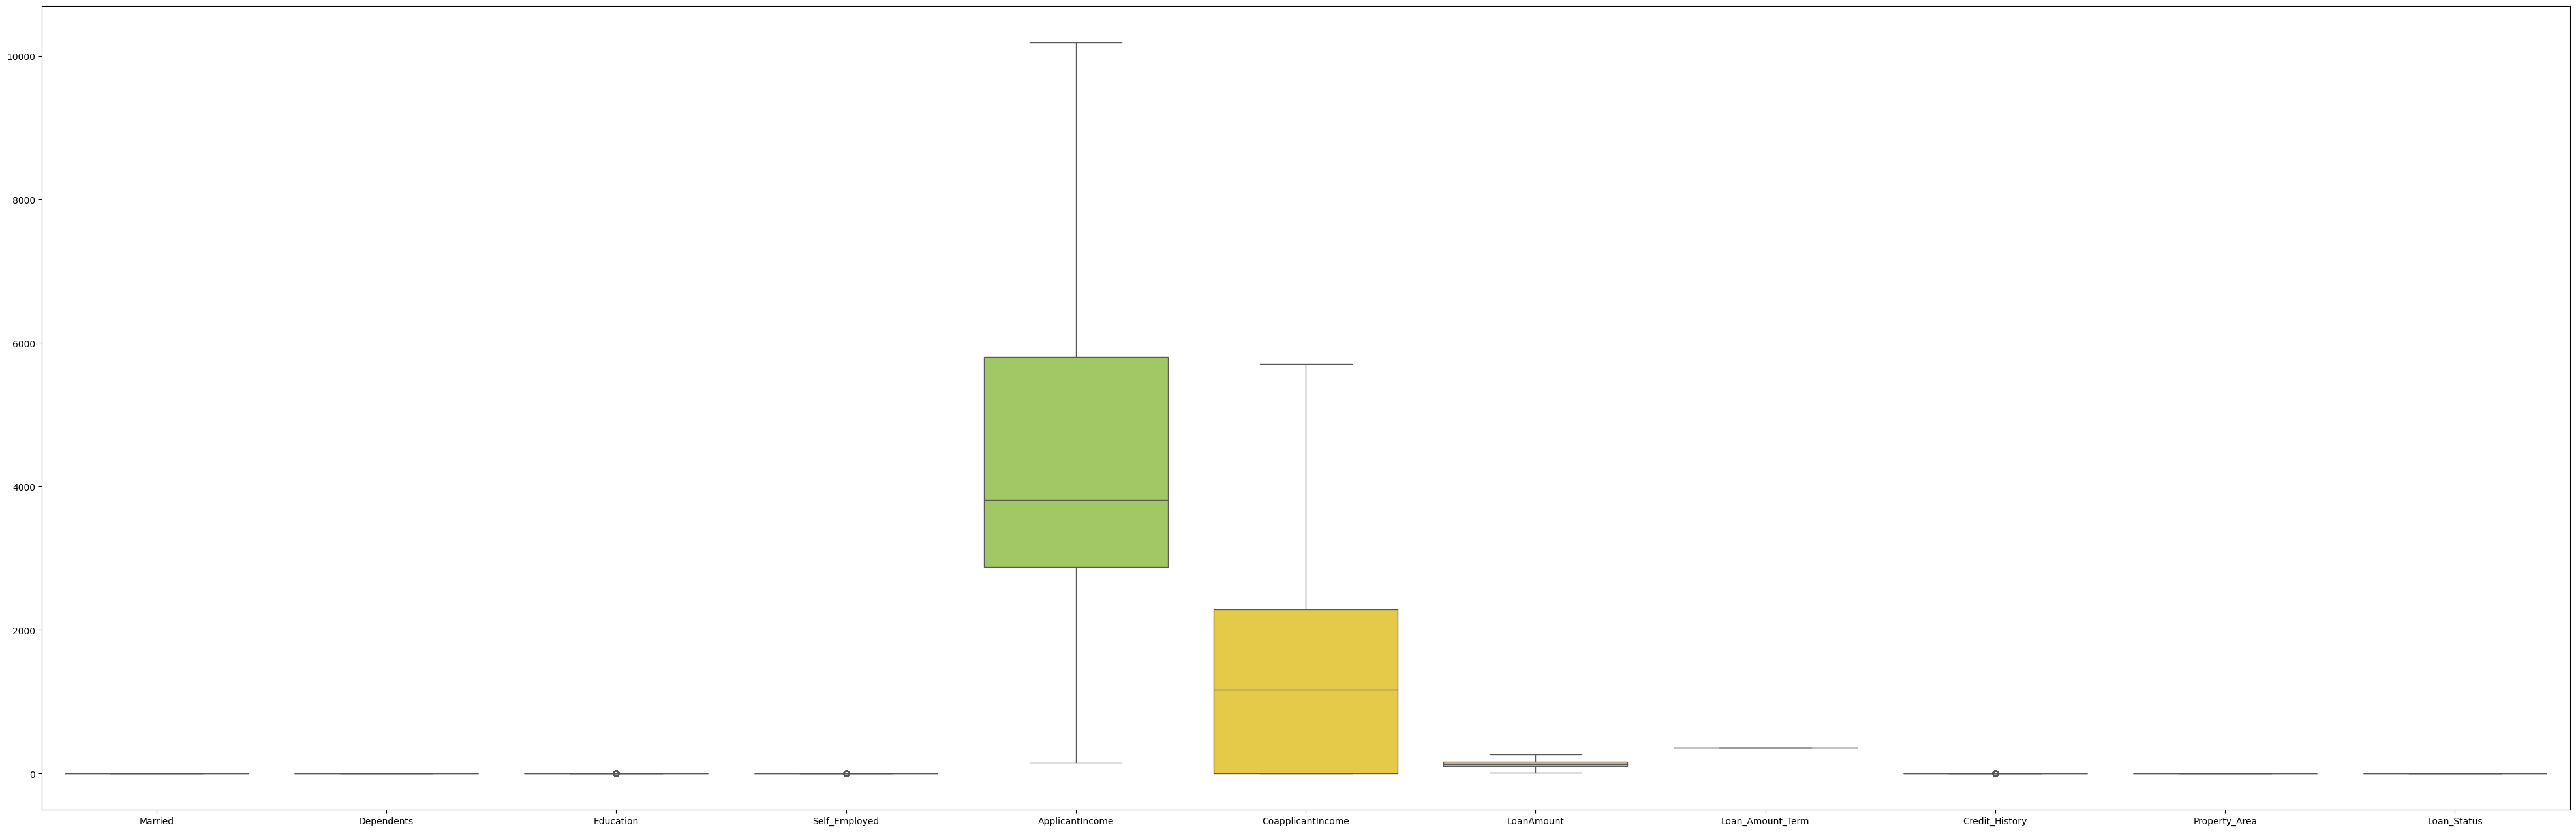

In [15]:
fig, ax = plt.subplots(figsize=(50,16))
sns.boxplot(data=my_data, orient="v", palette="Set2")
plt.show()


<Axes: >

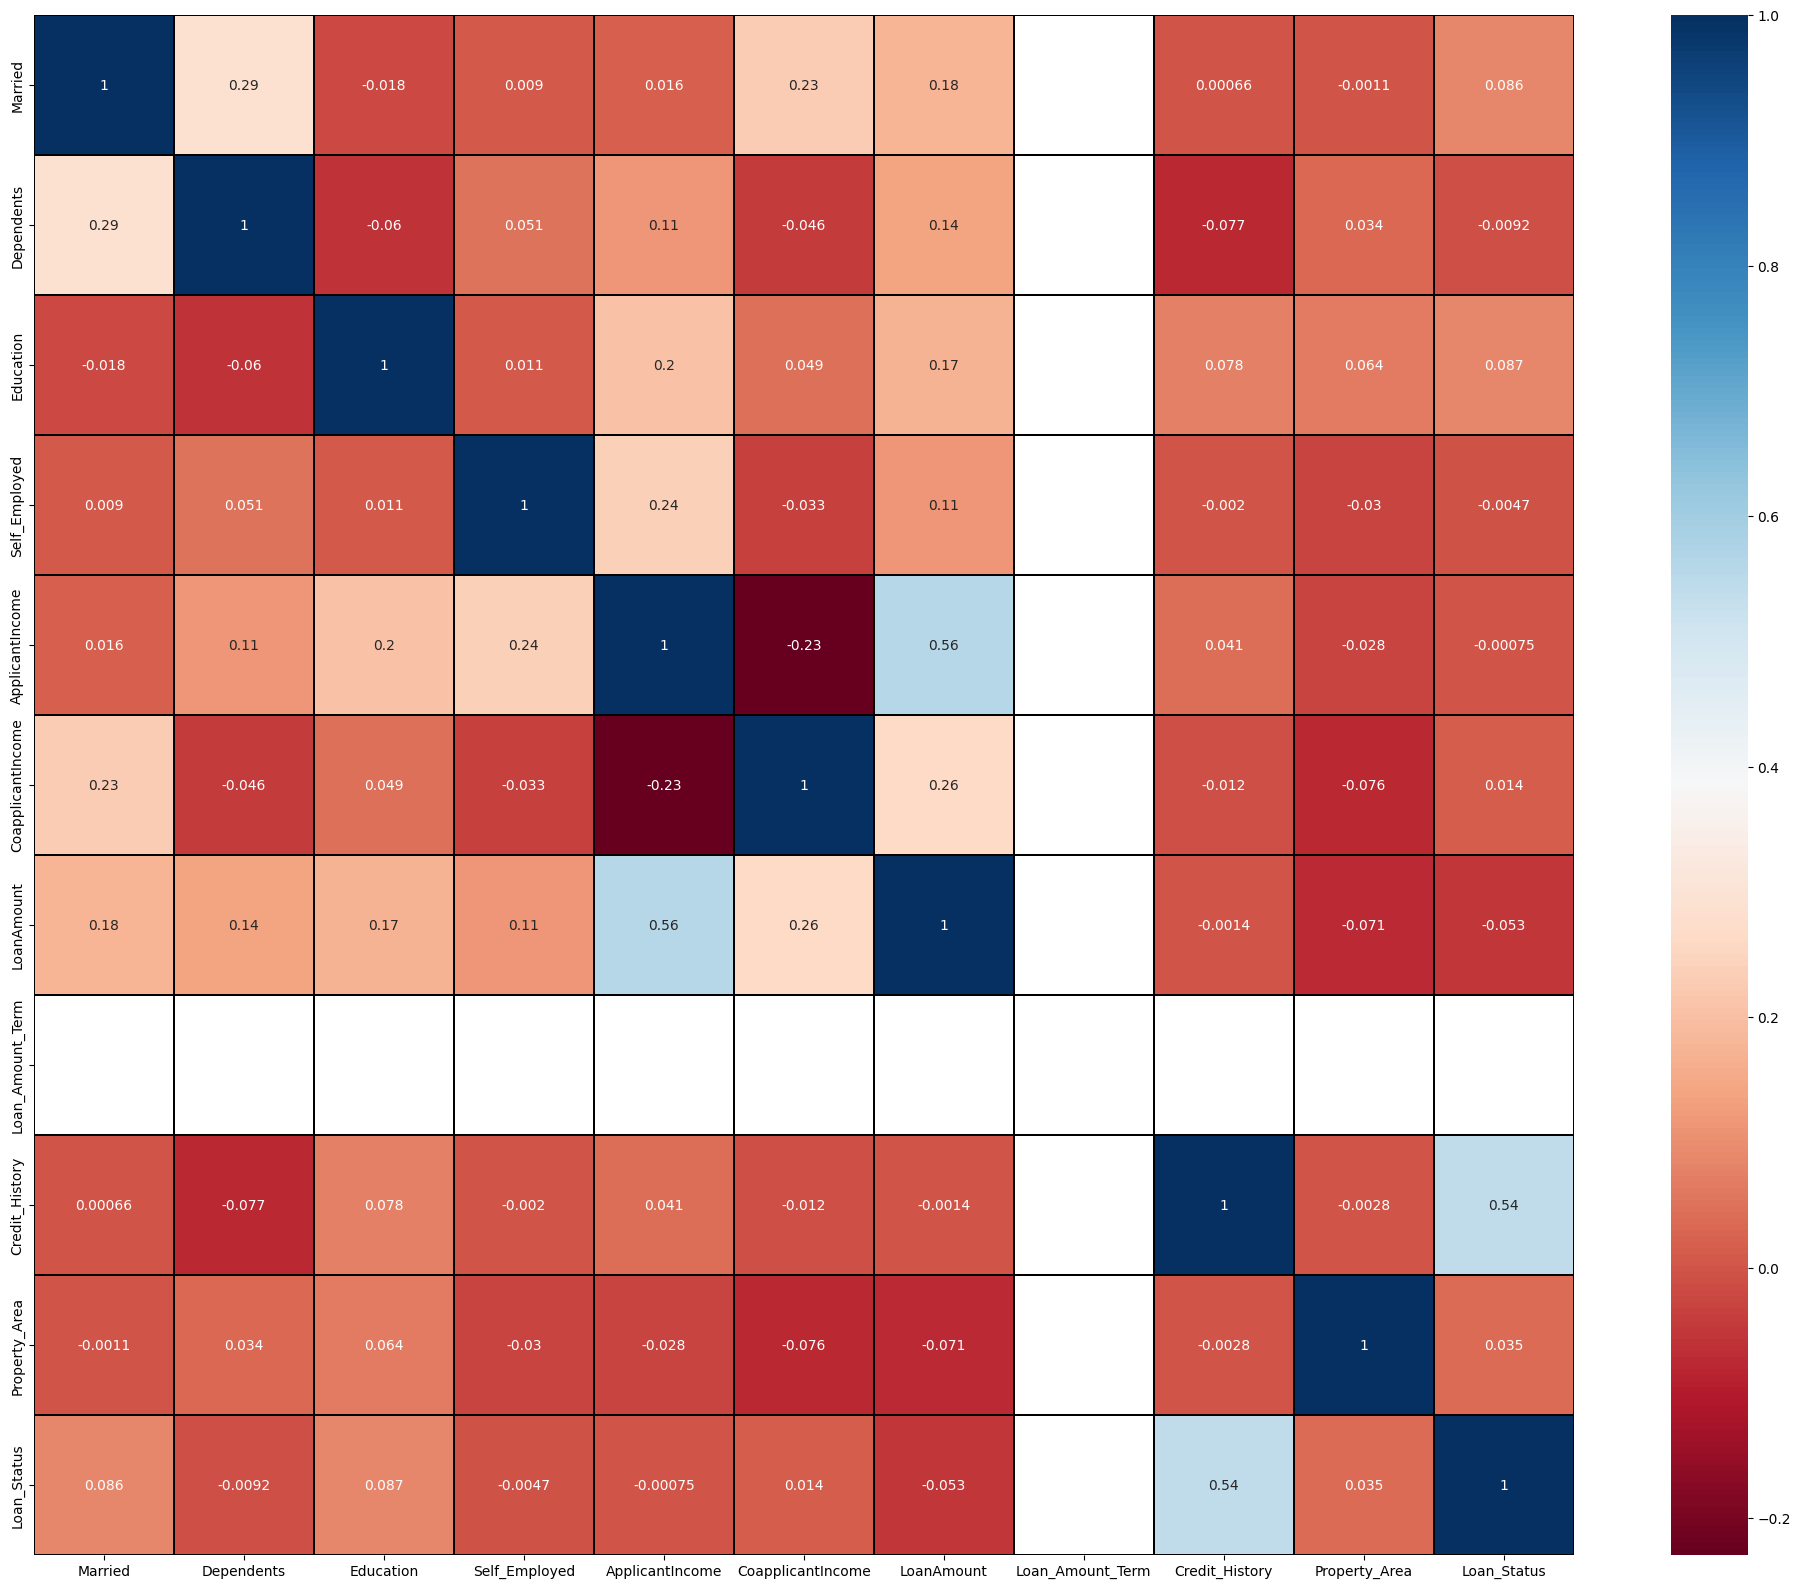

In [16]:
corrMatrix = my_data.corr()

# plot corrMatrix
fig, ax = plt.subplots(figsize=(25,20))
# sns.heatmap(corrMatrix, annot=True)
sns.heatmap(corrMatrix, annot=True, linewidth=0.01, square=True, cmap="RdBu", linecolor="black")

In [17]:
my_data.drop('Loan_Amount_Term',axis=1,inplace=True)

In [18]:
X = my_data.drop(["Loan_Status"],axis=1).values
y = my_data["Loan_Status"].values
print("X : ",X.shape," y : ",y.shape)

from sklearn.preprocessing import StandardScaler
st_scaler = StandardScaler()
st_scaler.fit(X)
X_st_scaler = st_scaler.transform(X)


# Split into Input and Output Elements
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_st_scaler,
              y, test_size= 0.20, random_state=100, stratify=y)

print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test = ", y_test.shape)


X :  (613, 9)  y :  (613,)
X_train =  (490, 9)  y_train =  (490,)
X_test  =  (123, 9)  y_test =  (123,)


In [29]:
from sklearn import svm, metrics

# Create a classifier: a support vector classifier

classifier = svm.SVC()
#classifier = svm.SVC(kernel="linear")
#classifier = svm.SVC(kernel="poly", degree=10, C=100, gamma=0.01)
#classifier = svm.SVC(kernel="sigmoid", C=10, gamma=0.001)
#classifier = svm.SVC(kernel="rbf", C=100, gamma=0.001)

# Train the classifier
classifier.fit(X_train, y_train)

predicted = classifier.predict(X_test)

# Classification report
print("Classification report : \n", classifier,"\n",
      metrics.classification_report(y_test, predicted))

Classification report : 
 SVC() 
               precision    recall  f1-score   support

           0       0.94      0.45      0.61        38
           1       0.80      0.99      0.88        85

    accuracy                           0.82       123
   macro avg       0.87      0.72      0.75       123
weighted avg       0.84      0.82      0.80       123



In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Create the classifier
# multi_class: default = "auto"
logreg = LogisticRegression()

# Train the classifier
logreg.fit(X_train,y_train)

# Predict the value of X_test
predicted = logreg.predict(X_test)

# Classification report
print("Classifier : ", logreg)
print("Classification report for classifier : \n", metrics.classification_report(y_test, predicted))

Classifier :  LogisticRegression()
Classification report for classifier : 
               precision    recall  f1-score   support

           0       0.94      0.42      0.58        38
           1       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123



In [21]:
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

# Create the classifier
# loss : hinge, log, modified_huber, squared_hinge, perceptron
sgdc_cls = SGDClassifier(loss="log", alpha=0.01, penalty="l2", max_iter=10000, random_state =42)

# Train the classifier
sgdc_cls.fit(X_train,y_train)

# Predict the value of X_test
predicted = sgdc_cls.predict(X_test)

# Classification report
print("Classifier : ", sgdc_cls)
print("Classification report for classifier : \n", metrics.classification_report(y_test, predicted))


Classifier :  SGDClassifier(alpha=0.01, loss='log', max_iter=10000, random_state=42)
Classification report for classifier : 
               precision    recall  f1-score   support

           0       0.94      0.42      0.58        38
           1       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Create the classifier

knn_cls = KNeighborsClassifier(n_neighbors = 25)

# Train the classifier
knn_cls.fit(X_train,y_train)

# Predict the value of X_test
predicted = knn_cls.predict(X_test)

# Classification report
print("Classifier : ", knn_cls)
print("Classification report for classifier : \n", metrics.classification_report(y_test, predicted))


Classifier :  KNeighborsClassifier(n_neighbors=25)
Classification report for classifier : 
               precision    recall  f1-score   support

           0       0.94      0.42      0.58        38
           1       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123



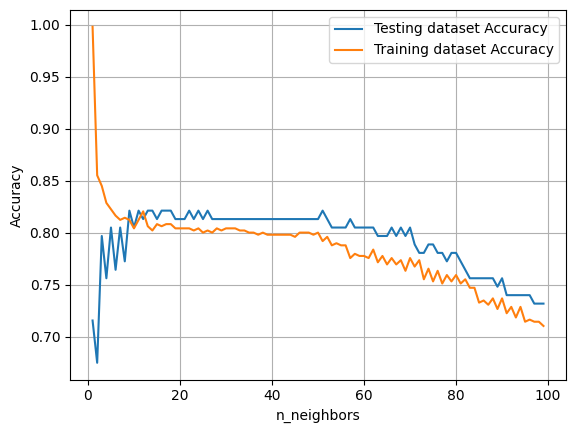

In [23]:
# K = [1, ..., 100]
neighbors = np.arange(1, 100)
train_accuracy = np.empty(len(neighbors))
test_accuracy  = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i]  = knn.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = "Testing dataset Accuracy")
plt.plot(neighbors, train_accuracy, label = "Training dataset Accuracy")
plt.legend()
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Create a Gaussian Classifier
GNB_cls = GaussianNB()

# Train the classifier
GNB_cls.fit(X_train,y_train)

# Predict the value of X_test
predicted = GNB_cls.predict(X_test)

# Classification report
print("Classifier : ", GNB_cls)
print("Classification report for classifier : \n", metrics.classification_report(y_test, predicted))

Classifier :  GaussianNB()
Classification report for classifier : 
               precision    recall  f1-score   support

           0       0.94      0.42      0.58        38
           1       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123

